In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline


from IPython.display import Image  
from sklearn import tree
import pydotplus

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from scipy.stats import pearsonr

In [2]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [3]:
df=pd.read_csv('student-por.csv', sep=";")

In [4]:
df.shape[1]

33

In [5]:
le = preprocessing.LabelEncoder()

In [6]:
for val in range(df.shape[1]):
    i=df.columns[val]
    if df[i].dtypes == object:
        df [i]= le.fit_transform(df[i])

In [7]:
df_binary=df

In [8]:
df_binary['G3'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

In [9]:
df=pd.read_csv('student-por.csv', sep=";")

In [10]:
df_multi=df

In [11]:
df_binary

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,1
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,1
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,1
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,1
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,0
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,1


In [12]:
 df_multi['G3']=df['G3'].apply(lambda x: 1 if x >= 16 and x<=20 else (2 if x < 16 and x>=14 else (3 if x < 14 and x>=12 else (4 if x < 12 and x>=10 else 5))))

In [13]:
df_multi

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,5
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,4


In [14]:
df=pd.read_csv('student-por.csv', sep=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## RandomForestClassifier

In [15]:
for val in range(df_multi.shape[1]):
    i=df_multi.columns[val]
    if df_multi[i].dtypes == object:
        df_multi [i]= le.fit_transform(df_multi[i])

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
X_train,X_test,y_train,y_test=train_test_split(df_multi.iloc[:,:-1],df_multi['G3'],test_size=0.3,random_state=0)

In [18]:
model=RandomForestClassifier(n_estimators=200)

In [19]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred=model.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.6974358974358974

In [22]:
recall_score(y_test, y_pred,average=None)  

array([0.8       , 0.38709677, 0.65454545, 0.85185185, 0.73333333])

In [23]:
precision_score(y_test, y_pred, average=None)  

array([0.8       , 0.57142857, 0.69230769, 0.67647059, 0.75862069])

In [24]:
f1_score(y_test, y_pred, average='macro') 

0.6868593460640577

In [25]:
confusion_matrix(y_test, y_pred)

array([[20,  5,  0,  0,  0],
       [ 5, 12, 14,  0,  0],
       [ 0,  4, 36, 15,  0],
       [ 0,  0,  1, 46,  7],
       [ 0,  0,  1,  7, 22]], dtype=int64)

In [26]:
pearsonr(y_test, y_pred)

(0.8990619069084748, 3.755127891335889e-71)

## Descision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier 

In [28]:
X_train,X_test,y_train,y_test=train_test_split(df_multi.iloc[:,:-1],df_multi['G3'],test_size=0.3,random_state=0)

In [29]:
clf = DecisionTreeClassifier(random_state=0)

In [30]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [31]:
t_val= np.array(['I','II','III','IV','V'])

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=X_train.columns,class_names=t_val)

In [33]:
graph = pydotplus.graph_from_dot_data(dot_data)  

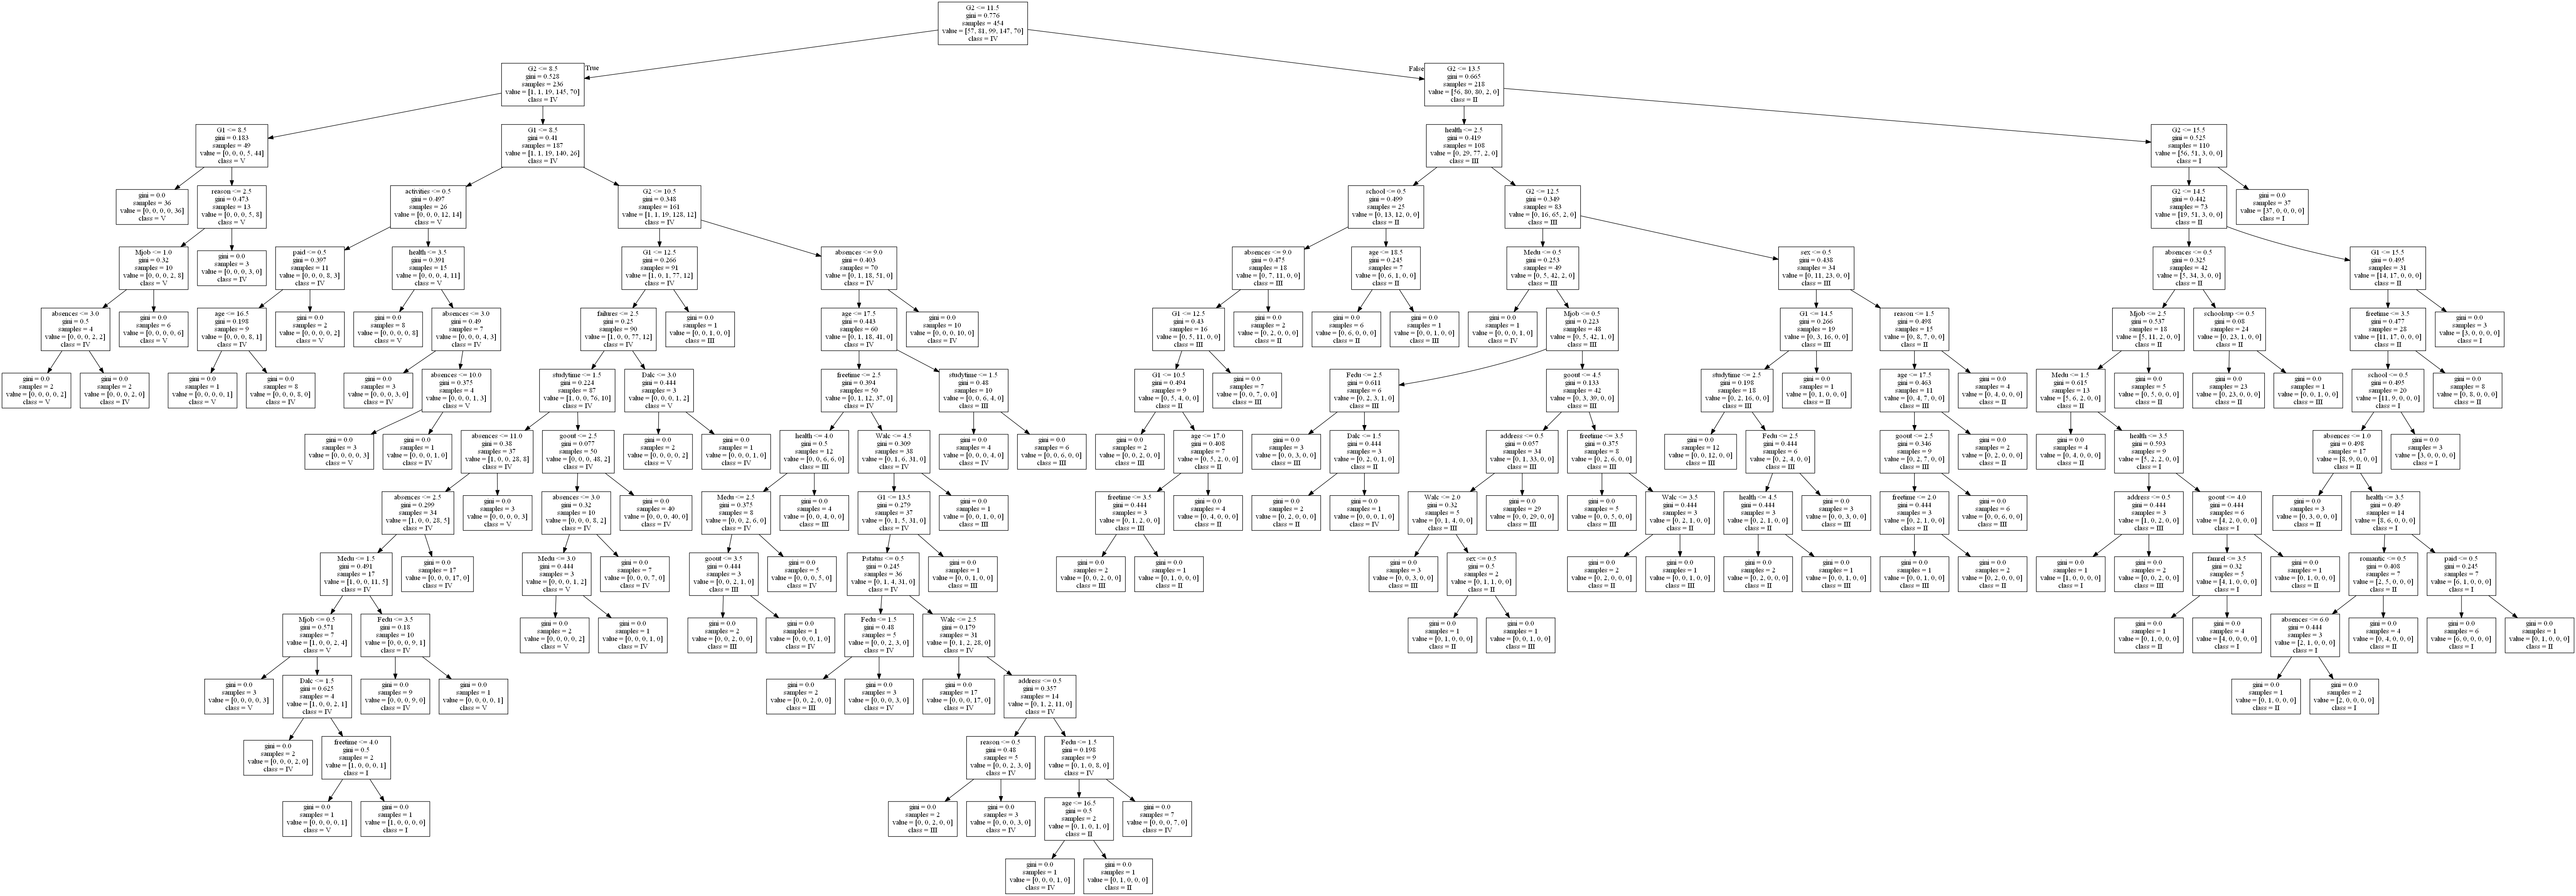

In [34]:
Image(graph.create_png())

In [35]:
graph.write_pdf("Decision-5.pdf")

True

In [36]:
y_pred=clf.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.6461538461538462

In [38]:
recall_score(y_test, y_pred,average=None)  

array([0.84      , 0.35483871, 0.63636364, 0.64814815, 0.8       ])

In [39]:
precision_score(y_test, y_pred, average=None)  

array([0.84      , 0.47826087, 0.59322034, 0.67307692, 0.66666667])

In [40]:
f1_score(y_test, y_pred, average='macro') 

0.6498185161779998

In [41]:
confusion_matrix(y_test, y_pred)

array([[21,  4,  0,  0,  0],
       [ 4, 11, 16,  0,  0],
       [ 0,  8, 35, 12,  0],
       [ 0,  0,  7, 35, 12],
       [ 0,  0,  1,  5, 24]], dtype=int64)

In [42]:
pearsonr(y_test, y_pred)

(0.8837999516081011, 1.3960087915112163e-65)

## Naive Bayers

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
X_train,X_test,y_train,y_test=train_test_split(df_multi.iloc[:,:-1],df_multi['G3'],test_size=0.3,random_state=0)

In [45]:
gnb =GaussianNB()

In [46]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
y_pred=gnb.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.48205128205128206

In [49]:
recall_score(y_test, y_pred,average=None)  

array([0.96      , 0.03225806, 0.25454545, 0.57407407, 0.8       ])

In [50]:
precision_score(y_test, y_pred, average=None)  

array([0.28235294, 0.5       , 0.53846154, 0.68888889, 0.64864865])

In [51]:
f1_score(y_test, y_pred, average='macro') 

0.4370658492051526

In [52]:
confusion_matrix(y_test, y_pred)

array([[24,  1,  0,  0,  0],
       [25,  1,  4,  1,  0],
       [33,  0, 14,  8,  0],
       [ 3,  0,  7, 31, 13],
       [ 0,  0,  1,  5, 24]], dtype=int64)

In [53]:
pearsonr(y_test, y_pred)

(0.7952434309147836, 8.206698476756863e-44)

##  SVM

In [54]:
from sklearn import svm

In [55]:
X_train,X_test,y_train,y_test=train_test_split(df_multi.iloc[:,:-1],df_multi['G3'],test_size=0.3,random_state=0)

In [56]:
svm_model = svm.SVC(gamma='scale')

In [57]:
svm_model.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
y_pred=svm_model.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred)

0.6974358974358974

In [60]:
recall_score(y_test, y_pred,average=None)  

array([0.6       , 0.51612903, 0.72727273, 0.90740741, 0.53333333])

In [61]:
precision_score(y_test, y_pred, average=None)  

array([0.9375    , 0.57142857, 0.68965517, 0.64473684, 0.94117647])

In [62]:
f1_score(y_test, y_pred, average='macro') 

0.6833484035749912

In [63]:
confusion_matrix(y_test, y_pred)

array([[15, 10,  0,  0,  0],
       [ 1, 16, 13,  1,  0],
       [ 0,  2, 40, 13,  0],
       [ 0,  0,  4, 49,  1],
       [ 0,  0,  1, 13, 16]], dtype=int64)

In [64]:
pearsonr(y_test, y_pred)

(0.8879556460635291, 5.1162563574468194e-67)

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
X_train,X_test,y_train,y_test=train_test_split(df_multi.iloc[:,:-1],df_multi['G3'],test_size=0.3,random_state=0)

In [67]:
logr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100000)

In [68]:
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred=logr.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred)

0.7025641025641025

In [71]:
recall_score(y_test, y_pred,average=None)  

array([0.8       , 0.51612903, 0.67272727, 0.77777778, 0.73333333])

In [72]:
precision_score(y_test, y_pred, average=None)  

array([0.8       , 0.53333333, 0.68518519, 0.71186441, 0.81481481])

In [73]:
f1_score(y_test, y_pred, average='macro') 

0.7037563805846089

In [74]:
confusion_matrix(y_test, y_pred)

array([[20,  5,  0,  0,  0],
       [ 4, 16, 10,  1,  0],
       [ 1,  8, 37,  9,  0],
       [ 0,  1,  6, 42,  5],
       [ 0,  0,  1,  7, 22]], dtype=int64)

In [75]:
pearsonr(y_test, y_pred)

(0.8816035777063237, 7.617752947973877e-65)

## KNN

In [76]:
 from sklearn.neighbors import KNeighborsClassifier

In [77]:
X_train,X_test,y_train,y_test=train_test_split(df_multi.iloc[:,:-1],df_multi['G3'],test_size=0.3,random_state=0)

In [78]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [79]:
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [80]:
y_pred=neigh.predict(X_test)

In [81]:
accuracy_score(y_test, y_pred)

0.5641025641025641

In [82]:
recall_score(y_test, y_pred,average=None)  

array([0.68      , 0.4516129 , 0.58181818, 0.57407407, 0.53333333])

In [83]:
precision_score(y_test, y_pred, average=None)  

array([0.65384615, 0.35      , 0.61538462, 0.55357143, 0.76190476])

In [84]:
f1_score(y_test, y_pred, average='macro') 

0.5700502097999561

In [85]:
confusion_matrix(y_test, y_pred)

array([[17,  8,  0,  0,  0],
       [ 7, 14,  8,  2,  0],
       [ 1, 12, 32, 10,  0],
       [ 1,  6, 11, 31,  5],
       [ 0,  0,  1, 13, 16]], dtype=int64)

In [86]:
pearsonr(y_test, y_pred)

(0.7958004165295618, 6.496974755674977e-44)

## RandomForestClassifier


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [88]:
X_train,X_test,y_train,y_test=train_test_split(df_binary.iloc[:,:-1],df_binary['G3'],test_size=0.3,random_state=0)

In [89]:
model=RandomForestClassifier(n_estimators=200)

In [90]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
y_pred=model.predict(X_test)

In [92]:
accuracy_score(y_test, y_pred)

0.9179487179487179

In [93]:
recall_score(y_test, y_pred)  

0.9515151515151515

In [94]:
precision_score(y_test, y_pred)  

0.9515151515151515

In [95]:
f1_score(y_test, y_pred) 

0.9515151515151515

In [96]:
confusion_matrix(y_test, y_pred)

array([[ 22,   8],
       [  8, 157]], dtype=int64)

In [97]:
pearsonr(y_test, y_pred)

(0.6848484848484848, 2.45902173591175e-28)

## Descision Tree

In [98]:
 from sklearn.tree import DecisionTreeClassifier 

In [99]:
X_train,X_test,y_train,y_test=train_test_split(df_binary.iloc[:,:-1],df_binary['G3'],test_size=0.3,random_state=0)

In [100]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')

In [101]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [102]:
t_val= np.array(['Pass','Fail'])

In [103]:
t_val

array(['Pass', 'Fail'], dtype='<U4')

In [104]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=X_train.columns,class_names=t_val)

In [105]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

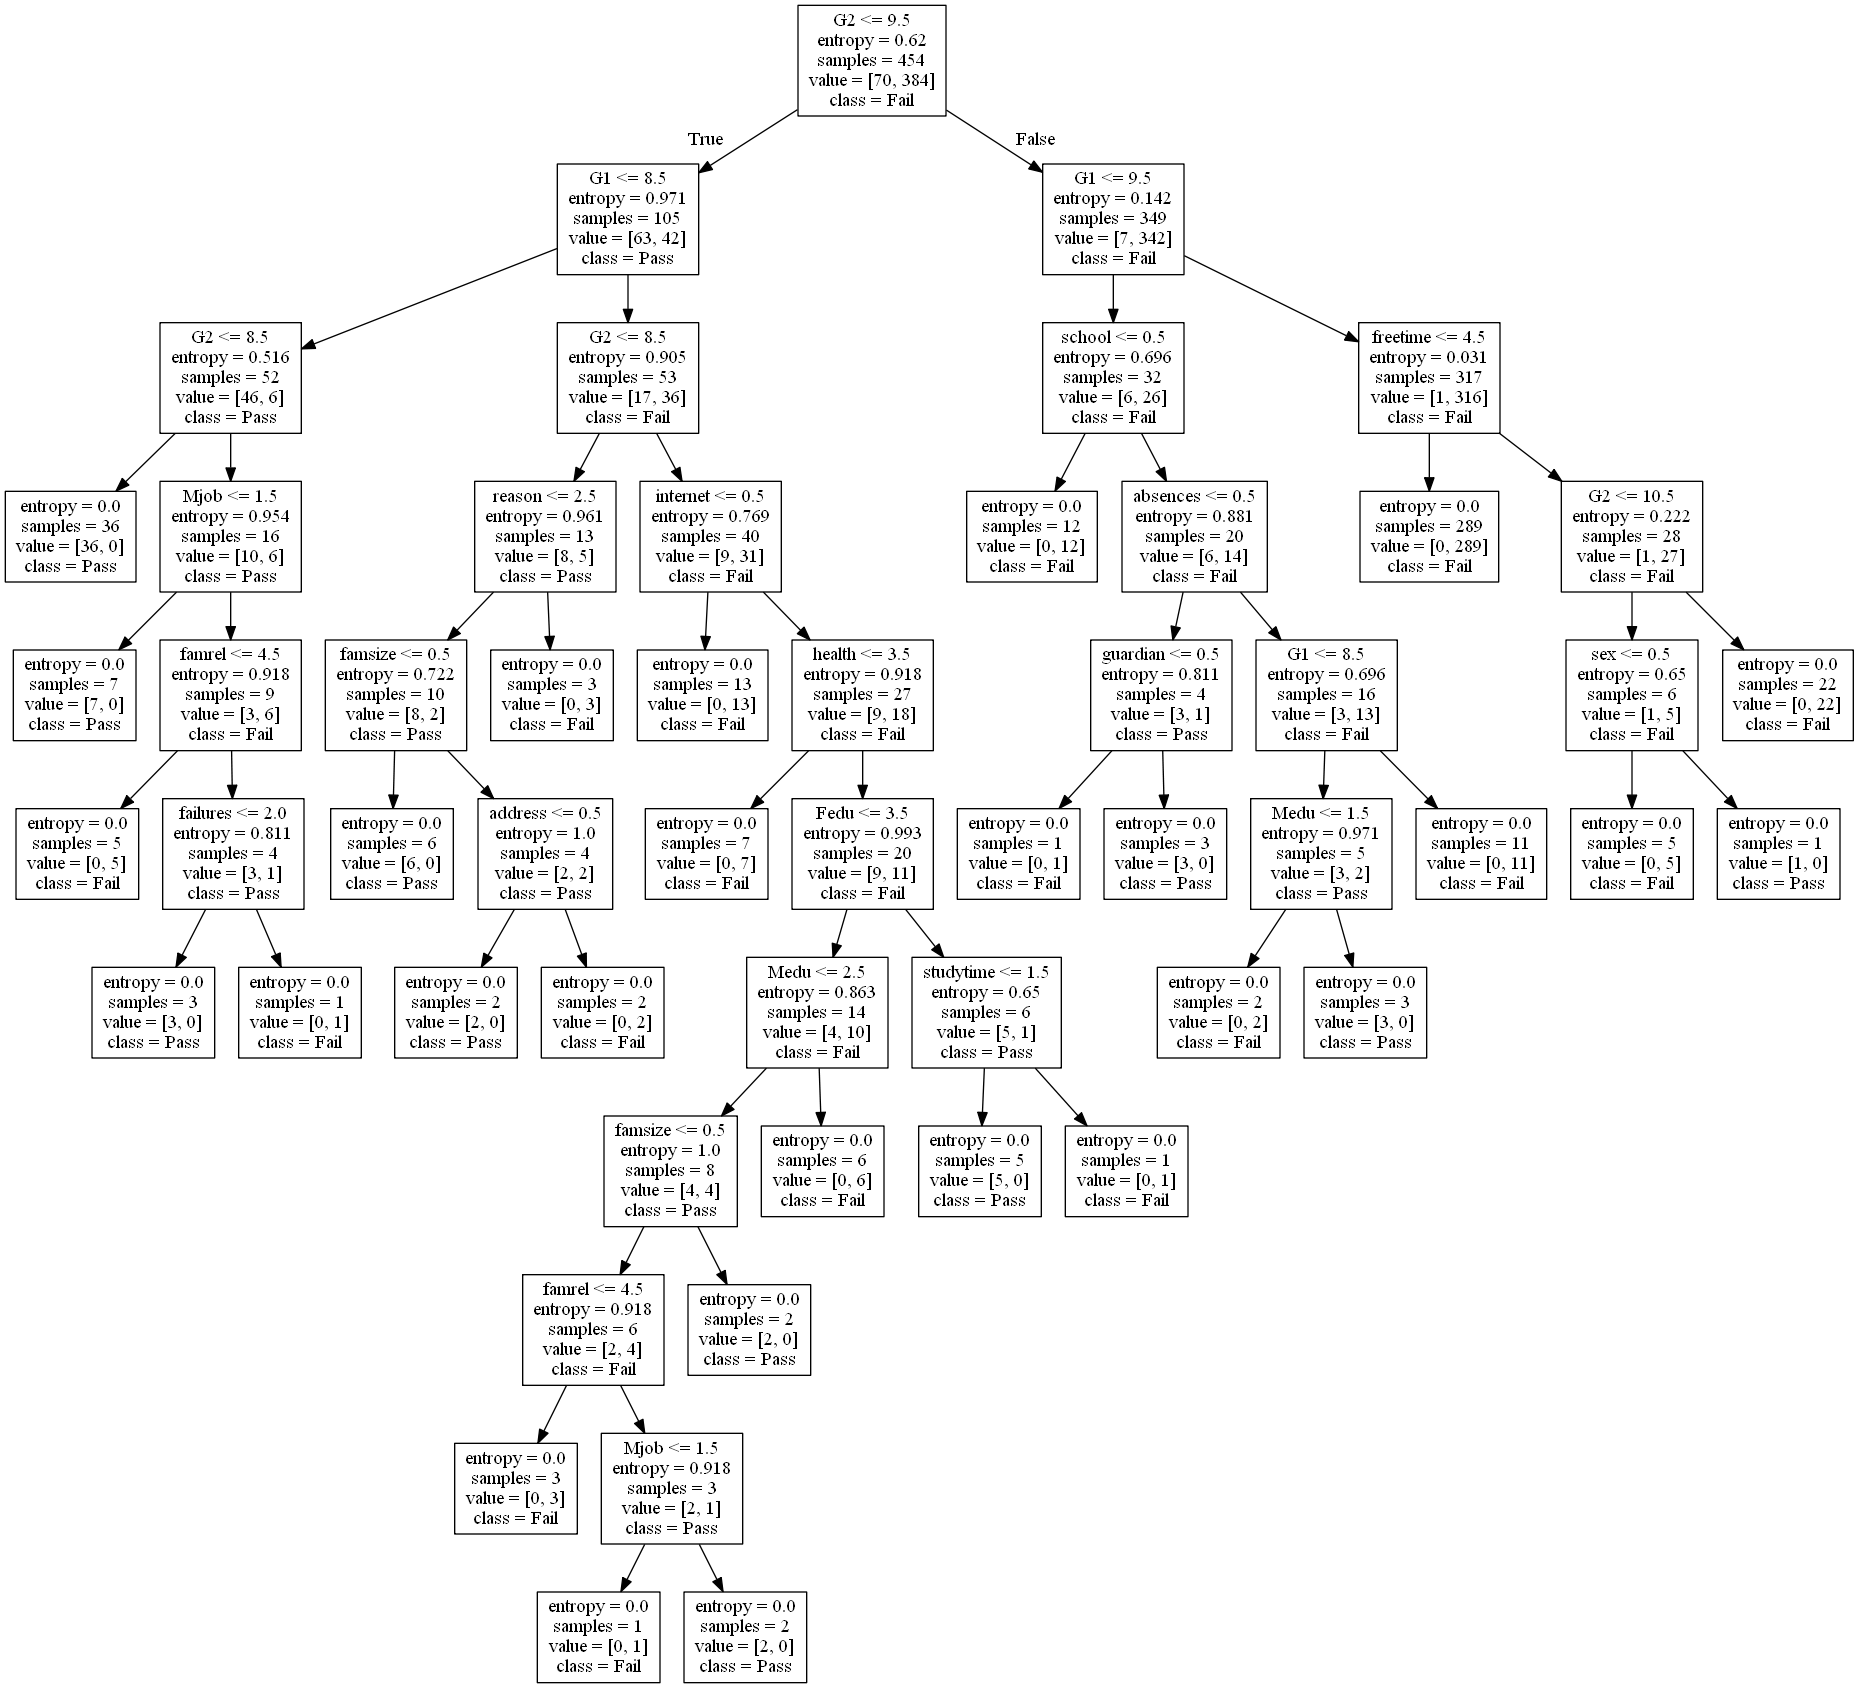

In [106]:

# Show graph
Image(graph.create_png())

In [107]:
graph.write_pdf("Decision-Bin.pdf")

True

In [108]:
y_pred=clf.predict(X_test)

In [109]:
accuracy_score(y_test, y_pred)

0.9384615384615385

In [110]:
recall_score(y_test, y_pred)  

0.9575757575757575

In [111]:
precision_score(y_test, y_pred)  

0.9693251533742331

In [112]:
f1_score(y_test, y_pred) 

0.9634146341463414

In [113]:
confusion_matrix(y_test, y_pred)

array([[ 25,   5],
       [  7, 158]], dtype=int64)

In [114]:
pearsonr(y_test, y_pred)

(0.7704782360418536, 1.350743333834972e-39)

## Naive Bayers

In [115]:
from sklearn.naive_bayes import GaussianNB

In [116]:
X_train,X_test,y_train,y_test=train_test_split(df_binary.iloc[:,:-1],df_binary['G3'],test_size=0.3,random_state=0)

In [117]:
gnb =GaussianNB()

In [118]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [119]:
y_pred=gnb.predict(X_test)

In [120]:
accuracy_score(y_test, y_pred)

0.882051282051282

In [121]:
recall_score(y_test, y_pred)  

0.9030303030303031

In [122]:
precision_score(y_test, y_pred)  

0.9551282051282052

In [123]:
f1_score(y_test, y_pred) 

0.928348909657321

In [124]:
confusion_matrix(y_test, y_pred)

array([[ 23,   7],
       [ 16, 149]], dtype=int64)

In [125]:
pearsonr(y_test, y_pred)

(0.6040686963408963, 8.872555163802004e-21)

##  SVM

In [126]:
from sklearn import svm

In [127]:
X_train,X_test,y_train,y_test=train_test_split(df_binary.iloc[:,:-1],df_binary['G3'],test_size=0.3,random_state=0)

In [128]:
svm_model = svm.SVC(gamma='scale')

In [129]:
svm_model.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [130]:
y_pred=svm_model.predict(X_test)

In [131]:
accuracy_score(y_test, y_pred)

0.9230769230769231

In [132]:
recall_score(y_test, y_pred)  

0.9939393939393939

In [133]:
precision_score(y_test, y_pred)  

0.9213483146067416

In [134]:
f1_score(y_test, y_pred) 

0.956268221574344

In [135]:
confusion_matrix(y_test, y_pred)

array([[ 16,  14],
       [  1, 164]], dtype=int64)

In [136]:
pearsonr(y_test, y_pred)

(0.6743780807752271, 3.2047629118869866e-27)

## Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
X_train,X_test,y_train,y_test=train_test_split(df_binary.iloc[:,:-1],df_binary['G3'],test_size=0.3,random_state=0)

In [139]:
logr = LogisticRegression(random_state=0, solver='lbfgs',max_iter=100000)

In [140]:
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
y_pred=logr.predict(X_test)

In [142]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [143]:
recall_score(y_test, y_pred)  

0.9696969696969697

In [144]:
precision_score(y_test, y_pred)  

0.9523809523809523

In [145]:
f1_score(y_test, y_pred) 

0.960960960960961

In [146]:
confusion_matrix(y_test, y_pred)

array([[ 22,   8],
       [  5, 160]], dtype=int64)

In [147]:
pearsonr(y_test, y_pred)

(0.7344126038510002, 2.541004334704942e-34)

## KNN

In [148]:

from sklearn.neighbors import KNeighborsClassifier

In [149]:
X_train,X_test,y_train,y_test=train_test_split(df_binary.iloc[:,:-1],df_binary['G3'],test_size=0.3,random_state=0)

In [150]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [151]:
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [152]:
y_pred=neigh.predict(X_test)

In [153]:
accuracy_score(y_test, y_pred)

0.9025641025641026

In [154]:
recall_score(y_test, y_pred)  

0.9696969696969697

In [155]:
precision_score(y_test, y_pred)  

0.9195402298850575

In [156]:
f1_score(y_test, y_pred) 

0.943952802359882

In [157]:
confusion_matrix(y_test, y_pred)

array([[ 16,  14],
       [  5, 160]], dtype=int64)

In [158]:
pearsonr(y_test, y_pred)

(0.5854805553718374, 2.486152686475425e-19)

## Comparison


| Dataset  | RF     | DT     | KNN    | SVM    | LR       | NB     |
|----------|--------|--------|--------|--------|----------|--------|
| Binary   | 92.820 | 92.307 | 90.256 | 92.307 |**93.333**| 88.205 |
| 5-class  | 69.230 | 64.615 | 56.410 | 69.743 |**70.256**| 48.205 |

#### Fig  :- Accuracy score

| Dataset  | RF     | DT     | KNN    | SVM    | LR     | NB     |
|----------|--------|--------|--------|--------|--------|--------|
| Binary   | 95.151 | 96.341 | 94.395 | 95.626 | 96.096 | 92.834 |
| 5-class  | 64.981 | 64.981 | 57.005 | 68.334 | 70.375 | 43.706 |

#### Fig  :- F1 score


| Dataset  | RF     | DT     | KNN    | SVM    | LR     | NB     |
|----------|--------|--------|--------|--------|--------|--------|
| Binary   | 68.484 |**77.047**| 58.548 | 67.437 | 73.441 | 60.406 |
| 5-class  |**90.274**| 88.379 | 79.580 | 88.795 | 88.160 | 79.524 |

#### Fig  :-  Pearson correlation coefficient